<a href="https://colab.research.google.com/github/Rajnishmaurya/ML-/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
url="https://raw.githubusercontent.com/Rajnishmaurya/ML-/main/Admission_Predict.csv"

In [3]:
data=pd.read_csv(url)

In [4]:
data


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Data looks good and there are no missing values.The first column is just a serial number, so we do not need that column. Let's drop it from data and make it more clean.

In [6]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
data=data.drop(columns=["Serial No."])
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


Let's visualize the data and analyze the relationship between independent and dependent valriables.

<ipython-input-8-82b92ade5ac5>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-8-82b92ade5ac5>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-8-82b92ade5ac5>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in 

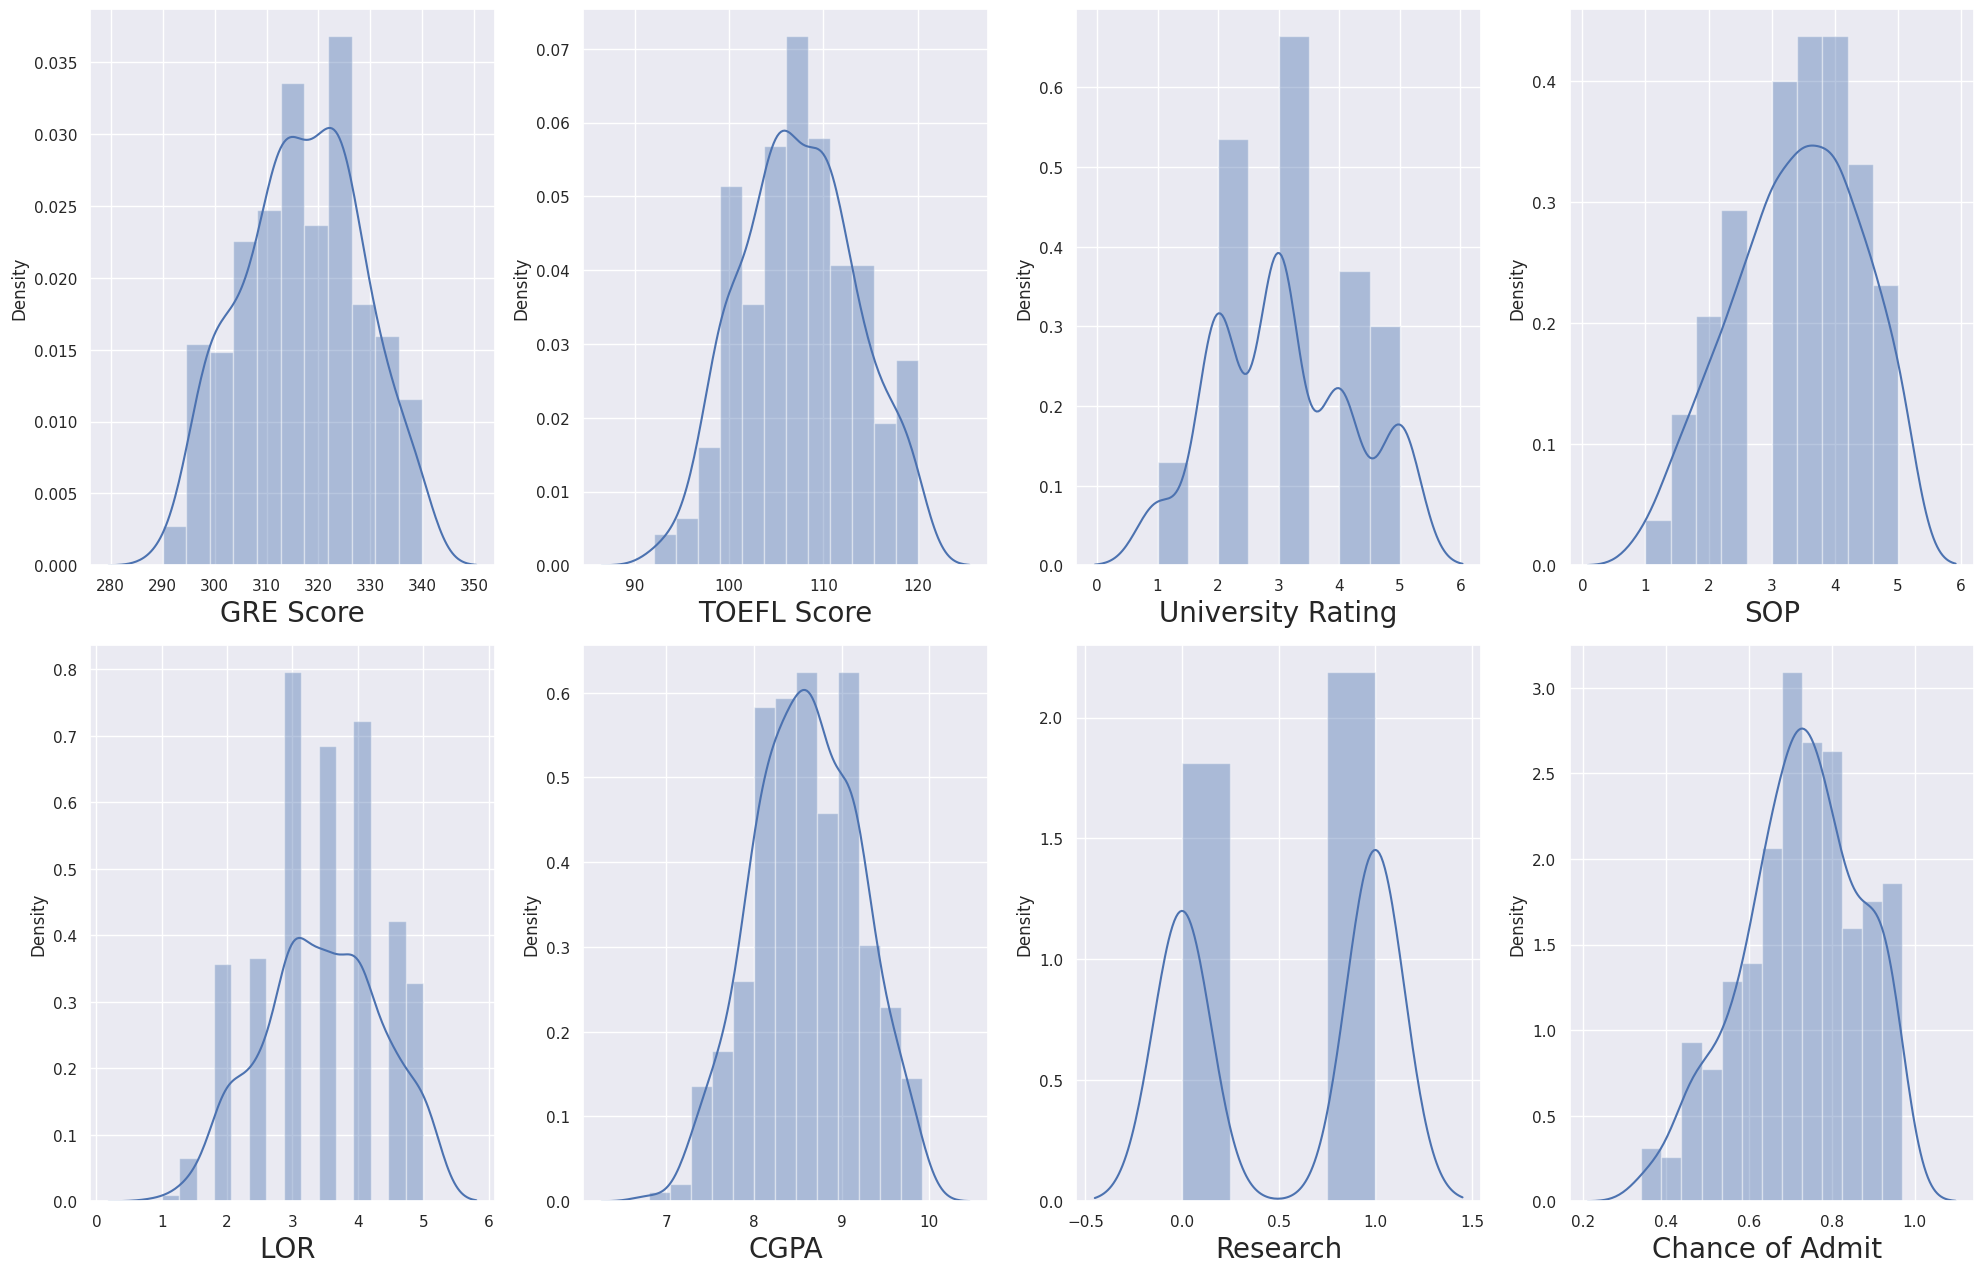

In [8]:
plt.figure(figsize=(20,25),facecolor='white')

plotnumber=1

for column in data:
  if plotnumber<=8:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()


The data distribution looks decent enough and there doesnot seem to be any skiwness.Great let's go ahead!

Let's observe the relationship betweem dependent and independent variables.

In [9]:
y=data['Chance of Admit ']
X=data.drop(columns = ['Chance of Admit '])

In [10]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

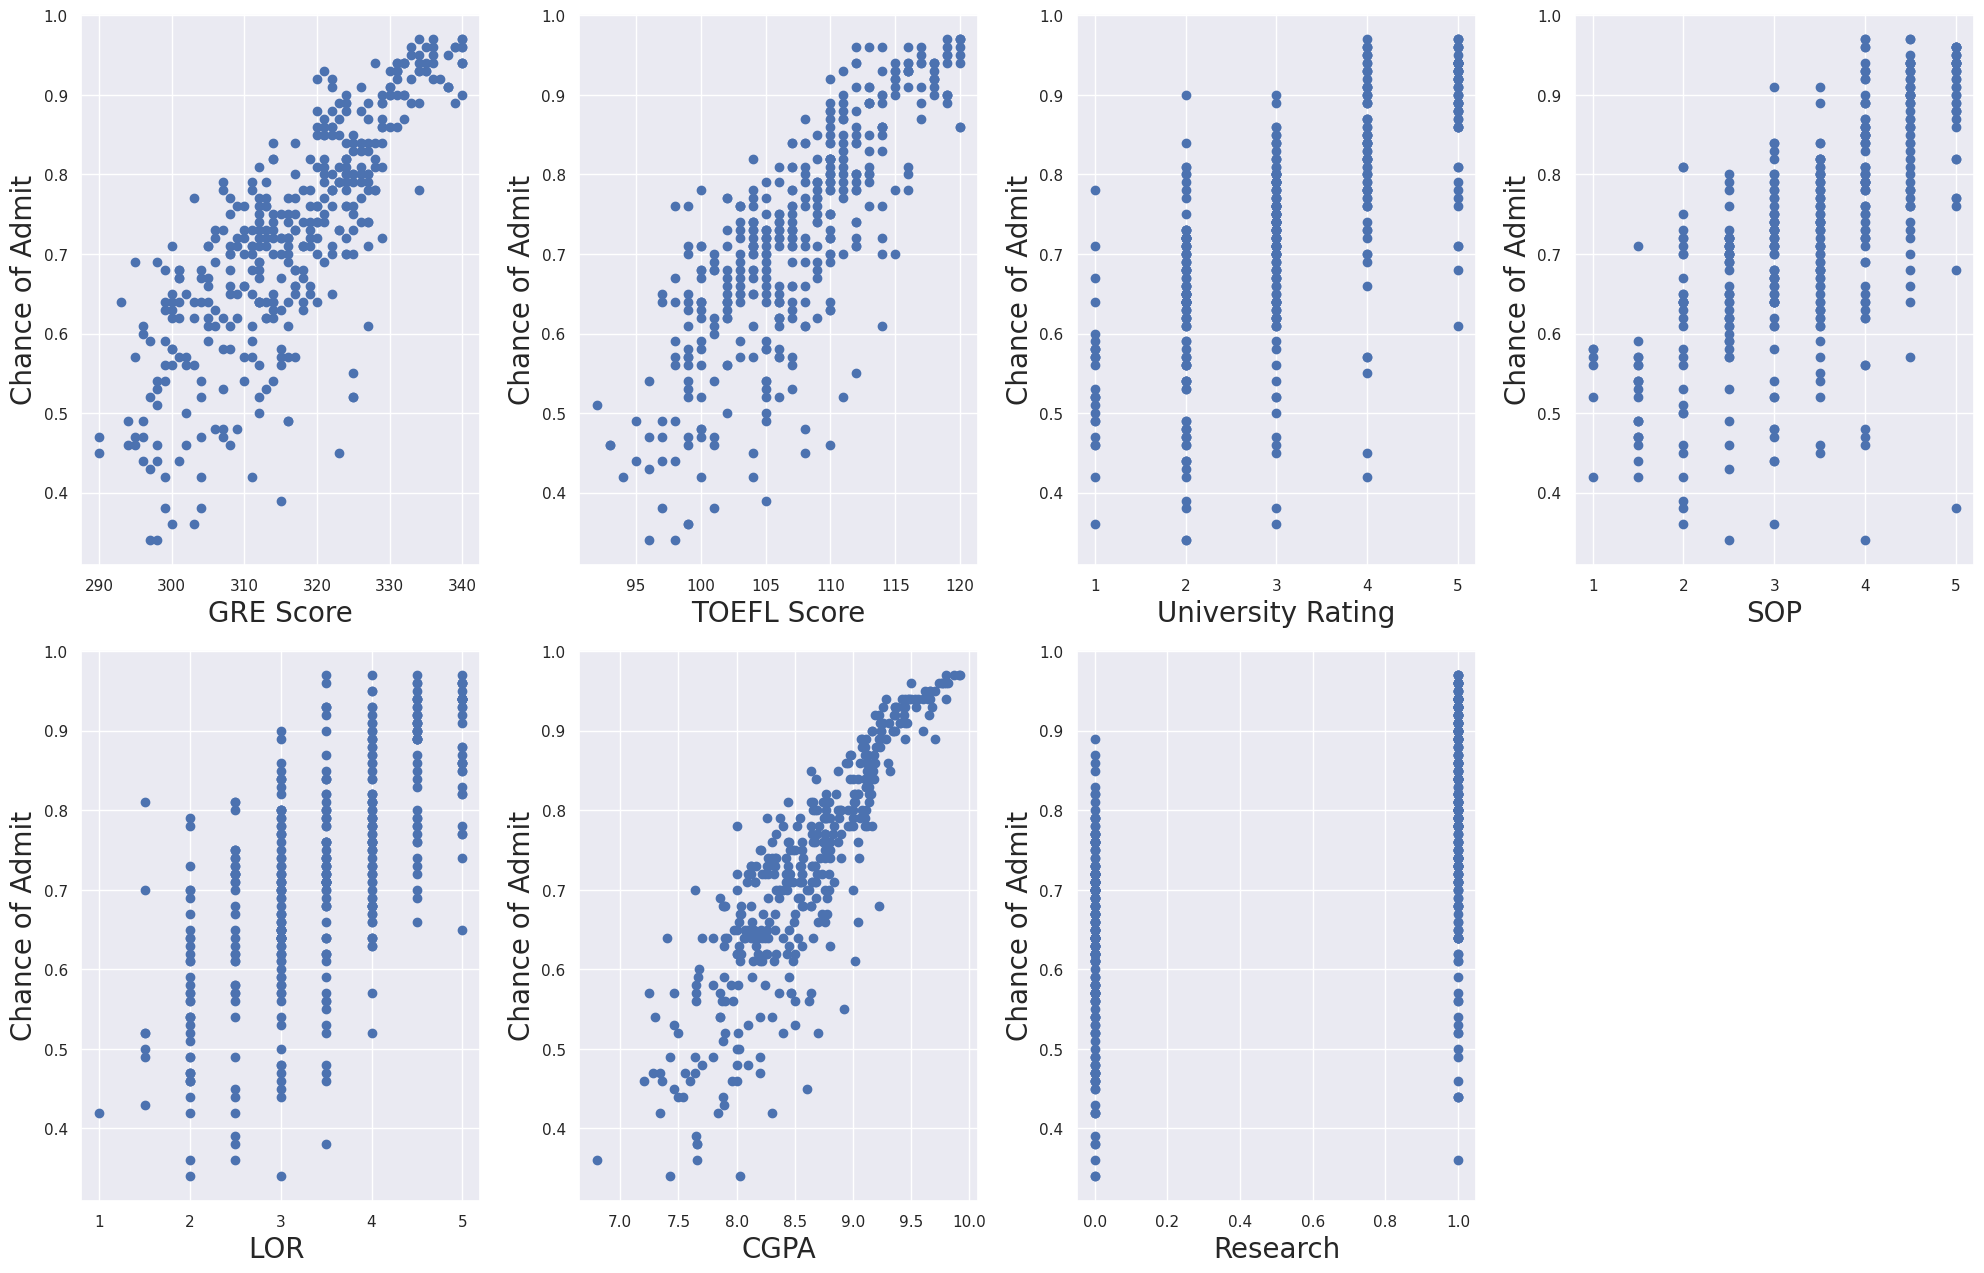

In [12]:
plt.figure(figsize=(20,25),facecolor='white')

plotnumber=1

for column in X:
  if plotnumber<=8:
    ax=plt.subplot(4,4,plotnumber)
    plt.scatter(data[column],y)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Chance of Admit',fontsize=20)
  plotnumber+=1
plt.tight_layout()


The relationship between the dependent and independent variables look fairly linear.

In [13]:
scaler=StandardScaler()

In [14]:
X_scaled=scaler.fit_transform(X)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=X_scaled

vif=pd.DataFrame()

vif['vif']=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['Features']=X.columns

In [16]:
vif

,vif,Features
0,4.615516,GRE Score
1,4.288959,TOEFL Score
2,2.919606,University Rating
3,3.075504,SOP
4,2.431258,LOR
5,5.207403,CGPA
6,1.543312,Research


Here, the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. CGPA features have VIF greater than 5. So, we have to remove the CGPA column.

In [22]:
X=X.drop(columns= ['CGPA'])
X

KeyError: "['CGPA'] not found in axis"

In [23]:
scaler=StandardScaler()

In [24]:
X_scaled=scaler.fit_transform(X)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=X_scaled

vif=pd.DataFrame()

vif['vif']=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['Features']=X.columns

In [26]:
vif

,vif,Features
0,3.946349,GRE Score
1,3.889980,TOEFL Score
2,2.822063,University Rating
3,3.013285,SOP
4,2.332471,LOR
5,1.542359,Research


Great, Lets go and use linear regression and see how good it fits for our data.But first let's split our data in train and test.

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)

In [29]:
y_train

93     0.44
222    0.76
350    0.74
332    0.75
282    0.81
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit , Length: 300, dtype: float64

In [30]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [32]:
# saving the model
import pickle

pickle.dump(regression,open('finalized_model.pickle', 'wb'))

In [35]:
# prediction using the saved model
loaded_model=pickle.load(open('finalized_model.pickle', 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
a

array([0.9786938])

In [37]:
regression.score(x_train,y_train)

0.790677924403959

In [39]:
def adj_r2(x,y):
  r2=regression.score(x,y)
  n=x.shape[0]
  p=x.shape[1]
  adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

In [40]:
adj_r2(x_train,y_train)

0.7863914655180333

R2 score is more than adjusted r2 for out training data set.

In [41]:
regression.score(x_test,y_test)

0.6474249721099778

In [42]:
adj_r2(x_test,y_test)

0.6246781961170732

It looks like our model r2 score is less on the test dataset.

Let's see if our model is overfitting our training data.

In [45]:
# Lasso Regualarization
# LassoCV will return best alpha and coefficients after performing 10 cross validation

lassocv=LassoCV(alphas=None,cv=10,max_iter=100000)
lassocv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100000)

In [47]:
# best alpha parameter
alpha=lassocv.alpha_
alpha

0.00011938709932395635

In [48]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00011938709932395635)

In [49]:
lasso_reg.score(x_test,y_test)

0.6473392412861367